<a href="https://colab.research.google.com/github/aaalexlit/hacking-human-vasculature/blob/main/notebooks/train_final_model_best_hyperparams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!git clone https://github.com/aaalexlit/hacking-human-vasculature.git
!pip install ultralytics
!pip install wandb

In [4]:
import os
from pathlib import Path
cur_path = Path.cwd()
os.environ['YOLO_CONFIG_DIR'] = str(cur_path)

In [3]:
%%writefile /content/settings.yaml
settings_version: 0.0.4
datasets_dir: /content
weights_dir: weights
runs_dir: runs
uuid: 569f3ba64b326db489132663f79cd37279811de477381b83ac131e6cdd129cbb
sync: true
api_key: ''
openai_api_key: ''
clearml: true
comet: true
dvc: true
hub: true
mlflow: true
neptune: true
raytune: true
tensorboard: true
wandb: true


Writing /content/settings.yaml


In [10]:
import yaml
train_path = 'train'
val_path = 'val'
test_path = 'test'
dataset_path = './hacking-human-vasculature/dataset'
names = {0: 'Vessel'}
yaml_path = 'yolo_dataset.yaml'

# Create a dictionary with the required content
yaml_data = {
    'names': names,
    'nc': len(names),
    'test': test_path,
    'train': train_path,
    'val': val_path,
    'path': dataset_path
}

# Write the dictionary to a YAML file
with open(yaml_path, 'w') as file:
    yaml.dump(yaml_data, file, default_flow_style=False)

In [1]:
import wandb
import getpass

**Important note:**.
Uncomment and run the following cell if you want to disable logging to WandB  
And don't run the one after next.

In [6]:
# os.environ["WANDB_DISABLED"] = "true"

In [7]:
wandb.login(key=getpass.getpass())

··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [2]:
from ultralytics import YOLO

project = 'blood_vessel_segmentation'


We'll continue training for 100 more epochs the best model resulted from the hyperparameter tuning.  
We'll set early stopping rounds to 10. Which means that the training will stop if there was not improvement observed for 10 epochs

In [9]:
best_hyperparams_path = 'hacking-human-vasculature/hyperparameter_tuning_results/best_hyperparameters.yaml'

with open(best_hyperparams_path, 'r') as f:
    best_hyperparams_dict = yaml.safe_load(f)

best_model_weights_path = 'hacking-human-vasculature/hyperparameter_tuning_results/best.pt'
model = YOLO(best_model_weights_path)

name = 'train_10_plus_100_epochs_1024_batch_4'

results = model.train(data=yaml_path,
                      project=project,
                      name=name,
                      epochs=100,
                      patience=10,
                      batch=4,
                      imgsz=1024,
                      cache=True,
                      optimizer='AdamW',
                      **best_hyperparams_dict
                     )

Ultralytics YOLOv8.1.3 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=hacking-human-vasculature/hyperparameter_tuning_results/best.pt, data=yolo_dataset.yaml, epochs=100, time=None, patience=10, batch=4, imgsz=1024, save=True, save_period=-1, cache=True, device=None, workers=8, project=blood_vessel_segmentation, name=train_10_plus_100_epochs_1024_batch_4, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames

100%|██████████| 755k/755k [00:00<00:00, 130MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

wandb: Currently logged in as: aaalex-lit. Use `wandb login --relogin` to force relogin


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.23M/6.23M [00:00<00:00, 281MB/s]


WARNING ⚠️ NMS time limit 0.550s exceeded
AMP: checks passed ✅


train: Scanning /content/hacking-human-vasculature/dataset/train/labels... 95 images, 5 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<00:00, 358.36it/s]


train: New cache created: /content/hacking-human-vasculature/dataset/train/labels.cache


train: Caching images (0.2GB True): 100%|██████████| 100/100 [00:00<00:00, 109.71it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/hacking-human-vasculature/dataset/val/labels... 25 images, 0 backgrounds, 0 corrupt: 100%|██████████| 25/25 [00:00<00:00, 87.95it/s] 


val: New cache created: /content/hacking-human-vasculature/dataset/val/labels.cache


val: Caching images (0.1GB True): 100%|██████████| 25/25 [00:00<00:00, 42.88it/s]


Plotting labels to blood_vessel_segmentation/train_10_plus_100_epochs_1024_batch_4/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
Image sizes 1024 train, 1024 val
Using 2 dataloader workers
Logging results to blood_vessel_segmentation/train_10_plus_100_epochs_1024_batch_4
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.55G      1.941      3.177      2.108     0.9859        208       1024: 100%|██████████| 25/25 [00:27<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.01it/s]

                   all         25       2699      0.202      0.113     0.0824     0.0345       0.19     0.0693     0.0536     0.0197



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100       2.5G      2.633      3.774      2.172      1.153        306       1024: 100%|██████████| 25/25 [00:17<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]

                   all         25       2699   0.000133   0.000371   6.67e-05   4.67e-05   0.000933    0.00259   0.000468   0.000187



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100       2.6G      2.717      3.059      2.075      1.226        199       1024: 100%|██████████| 25/25 [00:17<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.42it/s]

                   all         25       2699    0.00217    0.00519    0.00113   0.000259    0.00551    0.00482    0.00286   0.000381



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.37G       3.23      3.283      2.593      1.385        300       1024: 100%|██████████| 25/25 [00:17<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]


                   all         25       2699     0.0008    0.00222   0.000519   0.000104    0.00453     0.0126     0.0024   0.000621

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.85G      3.007      3.003      2.261      1.354        277       1024: 100%|██████████| 25/25 [00:18<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.27it/s]

                   all         25       2699     0.0008    0.00222   0.000519   0.000104    0.00453     0.0126     0.0024   0.000621



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.73G      2.962      2.794       2.15      1.325        215       1024: 100%|██████████| 25/25 [00:16<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.53it/s]


                   all         25       2699    0.00562     0.0126    0.00292   0.000823    0.00291    0.00445    0.00136   0.000332

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.55G      2.776      2.347      2.128      1.283        111       1024: 100%|██████████| 25/25 [00:17<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.35it/s]

                   all         25       2699     0.0012    0.00333   0.000612   0.000122          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100       3.1G      2.657      2.534      1.945      1.211        191       1024: 100%|██████████| 25/25 [00:17<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.94it/s]


                   all         25       2699      0.165     0.0974     0.0663     0.0271      0.201      0.101     0.0781     0.0392

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      3.31G      2.576      2.087      1.773      1.214        262       1024: 100%|██████████| 25/25 [00:16<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.83it/s]

                   all         25       2699      0.174     0.0715     0.0509     0.0167      0.242      0.128     0.0989     0.0364



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.59G      2.525      2.134      1.782      1.202        279       1024: 100%|██████████| 25/25 [00:17<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.41it/s]

                   all         25       2699      0.179     0.0104      0.012    0.00406     0.0267     0.0741     0.0257       0.01



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      3.12G      2.421      1.883      1.648      1.139        265       1024: 100%|██████████| 25/25 [00:16<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.09it/s]

                   all         25       2699      0.155       0.13     0.0592     0.0248      0.161      0.135     0.0685     0.0342



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.86G       2.36      2.032      1.561      1.166        202       1024: 100%|██████████| 25/25 [00:17<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]

                   all         25       2699      0.132     0.0322     0.0206    0.00873      0.146     0.0363     0.0244     0.0103



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.62G      2.304      1.932      1.521       1.09        174       1024: 100%|██████████| 25/25 [00:16<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]

                   all         25       2699       0.16      0.073     0.0407     0.0175      0.151     0.0852     0.0466     0.0249



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      3.11G      2.289      1.931      1.572      1.094        206       1024: 100%|██████████| 25/25 [00:16<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.83it/s]

                   all         25       2699        0.2     0.0663     0.0522     0.0275      0.186     0.0674     0.0503     0.0298



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.35G      2.179      1.848      1.485      1.069        241       1024: 100%|██████████| 25/25 [00:17<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.06it/s]

                   all         25       2699      0.418      0.163      0.169     0.0695      0.373       0.25      0.243      0.109



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.59G      2.158      1.826      1.398      1.073        249       1024: 100%|██████████| 25/25 [00:16<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.18it/s]


                   all         25       2699      0.392      0.186      0.187      0.087      0.345      0.192      0.188     0.0875

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.83G      2.099      1.641      1.402      1.057        230       1024: 100%|██████████| 25/25 [00:18<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.86it/s]

                   all         25       2699      0.403      0.189      0.196     0.0918      0.381      0.213      0.222      0.102



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100       2.7G      2.073      1.735      1.341      1.037        262       1024: 100%|██████████| 25/25 [00:16<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.22it/s]


                   all         25       2699       0.44      0.167      0.178     0.0815      0.393        0.2      0.211     0.0956

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.55G       2.14      1.889      1.357      1.073        295       1024: 100%|██████████| 25/25 [00:16<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.58it/s]

                   all         25       2699      0.336     0.0923      0.099     0.0484      0.306     0.0955      0.106     0.0544



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.72G      2.067       1.85      1.316      1.031        318       1024: 100%|██████████| 25/25 [00:18<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.29it/s]


                   all         25       2699      0.317     0.0908     0.0871     0.0421      0.284      0.113      0.111     0.0498

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.65G      2.051      1.759      1.319      1.047        134       1024: 100%|██████████| 25/25 [00:16<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.10it/s]

                   all         25       2699      0.404      0.196      0.192     0.0905      0.338       0.19      0.191     0.0868



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.62G      2.026      1.732      1.272      1.034        304       1024: 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.98it/s]

                   all         25       2699      0.441      0.214      0.215     0.0979      0.403      0.215      0.233      0.114



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.77G      1.952      1.598      1.228      1.044        245       1024: 100%|██████████| 25/25 [00:16<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]


                   all         25       2699      0.419      0.193      0.197      0.089      0.324      0.181      0.172      0.071

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.94G      1.895       1.52      1.215       1.03        253       1024: 100%|██████████| 25/25 [00:16<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.34it/s]

                   all         25       2699      0.532       0.24      0.274      0.128      0.444      0.212      0.243      0.108



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.69G      1.965       1.53      1.221      1.005        171       1024: 100%|██████████| 25/25 [00:15<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.09it/s]


                   all         25       2699      0.506      0.215      0.237      0.111      0.414       0.21      0.234      0.113

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100       2.8G       1.99      1.613       1.19      1.034        329       1024: 100%|██████████| 25/25 [00:17<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.66it/s]

                   all         25       2699      0.502      0.217      0.231      0.111      0.434      0.211       0.23      0.114



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.73G      1.883      1.557      1.157          1        248       1024: 100%|██████████| 25/25 [00:17<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.47it/s]


                   all         25       2699      0.549      0.231      0.251      0.124      0.419       0.22      0.237      0.115

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.61G       1.99      1.653      1.195      1.008        236       1024: 100%|██████████| 25/25 [00:26<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.89it/s]


                   all         25       2699      0.438      0.171      0.184     0.0921      0.408      0.166      0.191     0.0944

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.85G      1.981      1.678      1.206     0.9898        126       1024: 100%|██████████| 25/25 [00:16<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.10it/s]

                   all         25       2699      0.516      0.122      0.156     0.0747      0.512      0.122       0.17     0.0788



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.71G      1.954      1.592      1.168     0.9812        236       1024: 100%|██████████| 25/25 [00:18<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.33it/s]


                   all         25       2699      0.431      0.181      0.205       0.11      0.386      0.168      0.196     0.0962

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.99G      1.869       1.61      1.215     0.9991        182       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.38it/s]

                   all         25       2699      0.554      0.262      0.296      0.156      0.427      0.236       0.26      0.124



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.49G       1.85      1.478      1.128     0.9881        119       1024: 100%|██████████| 25/25 [00:19<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.19it/s]


                   all         25       2699       0.57      0.261      0.302      0.155      0.385      0.268      0.281      0.132

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.74G       1.82      1.605       1.09     0.9605        294       1024: 100%|██████████| 25/25 [00:18<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.10s/it]

                   all         25       2699      0.467      0.215      0.229      0.115       0.38      0.206      0.222      0.116



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.67G      1.775      1.484      1.074     0.9514        249       1024: 100%|██████████| 25/25 [00:18<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]

                   all         25       2699      0.363     0.0919      0.121      0.069      0.358     0.0908      0.122     0.0709



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.21G      1.752        1.5      1.059     0.9583        406       1024: 100%|██████████| 25/25 [00:19<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.24it/s]


                   all         25       2699      0.304     0.0893      0.124     0.0746      0.295     0.0867      0.122     0.0709

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.98G      1.715      1.462      1.042     0.9589        252       1024: 100%|██████████| 25/25 [00:16<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.12it/s]


                   all         25       2699      0.533      0.233      0.268       0.14      0.398      0.196      0.217      0.104

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.34G        1.8      1.571      1.104     0.9512        337       1024: 100%|██████████| 25/25 [00:17<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.43it/s]

                   all         25       2699      0.623       0.25      0.291      0.145      0.522       0.25      0.295      0.131



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.07G      1.785      1.538      1.068     0.9665        231       1024:  92%|█████████▏| 23/25 [00:16<00:01,  1.41it/s]


KeyboardInterrupt: 

In [10]:
wandb.finish()

lr/pg0,█▆▄▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr/pg1,▁▃▆████████▇▇▇▇▇▇▇▇▇▇▆▆▆▆▆▆▆▆▆▆▅▅▅▅▅▅
lr/pg2,▁▃▆████████▇▇▇▇▇▇▇▇▇▇▆▆▆▆▆▆▆▆▆▆▅▅▅▅▅▅
metrics/mAP50(B),▃▁▁▁▁▁▁▃▂▁▂▁▂▂▅▅▆▅▃▃▅▆▆▇▆▆▇▅▅▆██▆▄▄▇█
metrics/mAP50(M),▂▁▁▁▁▁▁▃▃▂▃▂▂▂▇▅▆▆▄▄▆▇▅▇▇▆▇▆▅▆▇█▆▄▄▆█
metrics/mAP50-95(B),▃▁▁▁▁▁▁▂▂▁▂▁▂▂▄▅▅▅▃▃▅▅▅▇▆▆▇▅▄▆██▆▄▄▇█
metrics/mAP50-95(M),▂▁▁▁▁▁▁▃▃▂▃▂▂▃▇▆▆▆▄▄▆▇▅▇▇▇▇▆▅▆██▇▅▅▇█
metrics/precision(B),▃▁▁▁▁▁▁▃▃▃▃▂▃▃▆▅▆▆▅▅▆▆▆▇▇▇▇▆▇▆▇▇▆▅▄▇█
metrics/precision(M),▄▁▁▁▁▁▁▄▄▁▃▃▃▃▆▆▆▆▅▅▆▆▅▇▇▇▇▆█▆▇▆▆▆▅▆█
metrics/recall(B),▄▁▁▁▁▁▁▄▃▁▄▂▃▃▅▆▆▅▃▃▆▇▆▇▇▇▇▆▄▆██▇▃▃▇█
metrics/recall(M),▃▁▁▁▁▁▁▄▄▃▅▂▃▃█▆▇▆▃▄▆▇▆▇▆▇▇▅▄▅▇█▆▃▃▆█


In [13]:
val_res = model.val()

Ultralytics YOLOv8.1.3 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/hacking-human-vasculature/dataset/val/labels.cache... 25 images, 0 backgrounds, 0 corrupt: 100%|██████████| 25/25 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.97s/it]


                   all         25       2699      0.653      0.239      0.281      0.144      0.552      0.251      0.308      0.144
Speed: 0.5ms preprocess, 33.9ms inference, 0.0ms loss, 3.7ms postprocess per image
Results saved to runs/segment/val3


In [14]:
test_val_res = model.val(split='test')

Ultralytics YOLOv8.1.3 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/hacking-human-vasculature/dataset/test/labels.cache... 25 images, 0 backgrounds, 0 corrupt: 100%|██████████| 25/25 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.04s/it]


                   all         25       2243      0.608      0.235      0.255      0.123      0.436      0.278      0.287      0.125
Speed: 0.5ms preprocess, 42.2ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/segment/val4


In [ ]:
model = YOLO('yolov8n-seg.pt')

name = 'train_100_epochs_1024_batch_4'

results = model.train(data=yaml_path,
                      project=project,
                      name=name,
                      epochs=100,
                      patience=10,
                      batch=4,
                      imgsz=1024,
                      cache=True,
                      **best_hyperparams_dict
                     )

In [16]:
wandb.finish()

lr/pg0,▁▃██████▇▇▇▇▇▇▆▆▆▆▆▆▆▅▅▅▅▅▅▅▄▄▄▄▄▄▄▃▃▃▃▃
lr/pg1,▁▃██████▇▇▇▇▇▇▆▆▆▆▆▆▆▅▅▅▅▅▅▅▄▄▄▄▄▄▄▃▃▃▃▃
lr/pg2,▁▃██████▇▇▇▇▇▇▆▆▆▆▆▆▆▅▅▅▅▅▅▅▄▄▄▄▄▄▄▃▃▃▃▃
metrics/mAP50(B),▁▁▅▅▅▆▆▆▇▆▇▇▇▇▇▇▇▇▇▇▇▇███▇██▇███████████
metrics/mAP50(M),▁▁▅▅▅▆▆▆▇▆▇▇▇▇████▇▇▇▇▇▇▇█▇▇█▇████████▇█
metrics/mAP50-95(B),▁▁▄▄▄▅▆▆▆▆▆▆▇▆▆▇▆▇▇▇▇▇▇██▇▇█▇███████████
metrics/mAP50-95(M),▁▁▄▅▅▅▆▆▆▆▆▇▇▇█▇█▇▆▇▆▇▇▆▆▇▇▇▇▆█▇███▇▇▇▇█
metrics/precision(B),▁▁▂▆▅▆▆▇▇▇▇▇█▇▇█▇█▇▇▇▇▇▇█▇█▇█▇▇██████▇▇█
metrics/precision(M),▁▁▂▆▆▆▆▇▇▇▇█▇▇▇▇█▇▇▇█▇▇▇▇█▇▇█▇▇▇██▇▇▇█▇█
metrics/recall(B),▁▁▆▅▅▆▆▆▆▆▆▇▇▆▇▇▇▇▇▇▆▇█▇▇▇██▇██▇▇███▇██▇
metrics/recall(M),▂▁▆▅▅▆▆▆▆▆▆▇▇▇████▇▇▆▇▇▇▇▇▇▇▇▇████████▇█


In [12]:
model = YOLO('yolov8n-seg.pt')

name = 'train_50_epochs_1600_batch_9'

results = model.train(data=yaml_path,
                      project=project,
                      name=name,
                      epochs=50,
                      patience=5,
                      batch=9,
                      imgsz=1600,
                      cache=True
                     )

Ultralytics YOLOv8.1.3 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=yolo_dataset.yaml, epochs=50, time=None, patience=5, batch=9, imgsz=1600, save=True, save_period=-1, cache=True, device=None, workers=8, project=blood_vessel_segmentation, name=train_50_epochs_1600_batch_9, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, sho

Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
WARNING ⚠️ NMS time limit 0.550s exceeded
AMP: checks passed ✅


train: Scanning /content/hacking-human-vasculature/dataset/train/labels.cache... 95 images, 5 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]
train: Caching images (0.5GB True): 100%|██████████| 100/100 [00:02<00:00, 49.55it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/hacking-human-vasculature/dataset/val/labels.cache... 25 images, 0 backgrounds, 0 corrupt: 100%|██████████| 25/25 [00:00<?, ?it/s]
val: Caching images (0.1GB True): 100%|██████████| 25/25 [00:01<00:00, 24.26it/s]


Plotting labels to blood_vessel_segmentation/train_50_epochs_1600_batch_9/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0004921875), 76 bias(decay=0.0)
Image sizes 1600 train, 1600 val
Using 2 dataloader workers
Logging results to blood_vessel_segmentation/train_50_epochs_1600_batch_9
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.55G      2.868      4.932      4.567      1.635         48       1600: 100%|██████████| 12/12 [00:41<00:00,  3.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.72s/it]

                   all         25       2699     0.0004    0.00111   0.000209   5.54e-05   0.000267   0.000741   0.000143    2.1e-05



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50      14.8G      1.789      2.318      2.861     0.9316         99       1600: 100%|██████████| 12/12 [00:22<00:00,  1.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.35s/it]

                   all         25       2699     0.0128     0.0356     0.0291     0.0199      0.014     0.0389     0.0293     0.0208



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50      13.8G      1.571      1.824      2.001     0.8882         45       1600: 100%|██████████| 12/12 [00:24<00:00,  2.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.64s/it]

                   all         25       2699    0.00733     0.0204     0.0135     0.0089     0.0143     0.0396     0.0207      0.013



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50      14.6G       1.56      1.725      1.768      0.881         73       1600: 100%|██████████| 12/12 [00:25<00:00,  2.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.64s/it]

                   all         25       2699     0.0147     0.0408     0.0154     0.0119     0.0156     0.0433     0.0162      0.012



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50      13.5G      1.467       1.53      1.477     0.8711        191       1600: 100%|██████████| 12/12 [00:27<00:00,  2.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.34s/it]

                   all         25       2699     0.0277     0.0771      0.027     0.0176     0.0335      0.093     0.0307     0.0189



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50      15.5G      1.459      1.495      1.467      0.887         40       1600: 100%|██████████| 12/12 [00:25<00:00,  2.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.35s/it]

                   all         25       2699     0.0436      0.121      0.049     0.0341     0.0412      0.114     0.0463     0.0273



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50      14.1G      1.435      1.521      1.399     0.8789        115       1600: 100%|██████████| 12/12 [00:25<00:00,  2.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.41s/it]

                   all         25       2699     0.0916      0.255       0.21      0.134     0.0883      0.245      0.203      0.122



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50      14.5G      1.405        1.5      1.328     0.8618        133       1600: 100%|██████████| 12/12 [00:25<00:00,  2.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.41s/it]

                   all         25       2699      0.364      0.255       0.21      0.118      0.411      0.208      0.183     0.0839



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50      14.8G      1.398      1.387      1.357     0.8593         59       1600: 100%|██████████| 12/12 [00:25<00:00,  2.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.59s/it]

                   all         25       2699      0.682      0.259      0.341      0.192      0.633      0.238      0.306      0.155



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50      14.6G      1.321      1.388       4.12     0.8021          0       1600: 100%|██████████| 12/12 [00:26<00:00,  2.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.70s/it]

                   all         25       2699      0.735      0.313      0.391      0.212      0.622      0.265      0.321       0.15



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50      15.3G      1.441      1.474      1.267     0.8647        179       1600: 100%|██████████| 12/12 [00:25<00:00,  2.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.51s/it]

                   all         25       2699      0.698      0.361      0.408      0.211      0.616      0.325      0.378      0.185



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50      14.7G      1.442      1.457      1.226     0.8661        149       1600: 100%|██████████| 12/12 [00:26<00:00,  2.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.31s/it]

                   all         25       2699      0.641      0.342      0.397      0.233      0.603      0.285       0.34      0.175



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50      12.1G      1.307      1.282      1.207     0.8501         72       1600: 100%|██████████| 12/12 [00:25<00:00,  2.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.40s/it]

                   all         25       2699      0.665      0.371      0.434      0.256      0.617      0.335      0.407      0.216



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50      15.4G      1.277      1.243      1.143     0.8612         33       1600: 100%|██████████| 12/12 [00:24<00:00,  2.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.52s/it]

                   all         25       2699        0.7       0.39      0.457      0.248      0.586      0.333      0.403      0.193



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50        15G        1.3      1.304        1.1     0.8496         98       1600: 100%|██████████| 12/12 [00:25<00:00,  2.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.57s/it]

                   all         25       2699      0.711      0.404       0.47      0.265      0.588      0.379      0.446      0.228



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50      14.9G      1.299      1.243      1.083     0.8473         99       1600: 100%|██████████| 12/12 [00:24<00:00,  2.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.83s/it]

                   all         25       2699      0.698      0.388      0.453      0.253      0.605      0.359      0.437      0.221



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50      14.4G      1.325      1.232      1.089     0.8484        110       1600: 100%|██████████| 12/12 [00:24<00:00,  2.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.66s/it]

                   all         25       2699      0.701      0.375      0.452      0.246      0.579       0.33      0.387      0.175



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50      12.5G      1.361      1.431      1.098     0.8472        156       1600: 100%|██████████| 12/12 [00:26<00:00,  2.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.29s/it]

                   all         25       2699      0.723       0.38      0.446      0.247      0.623      0.393       0.47      0.253



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50        14G      1.294      1.236       1.03     0.8551         70       1600: 100%|██████████| 12/12 [00:25<00:00,  2.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.33s/it]

                   all         25       2699      0.736      0.392      0.459      0.252        0.6      0.369       0.43      0.215



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50      12.8G      1.283      1.203      0.998     0.8469         65       1600: 100%|██████████| 12/12 [00:25<00:00,  2.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]

                   all         25       2699      0.721      0.406      0.474      0.259      0.578      0.312      0.363      0.166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50        13G      1.256      1.233     0.9917     0.8435        133       1600: 100%|██████████| 12/12 [00:27<00:00,  2.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.38s/it]

                   all         25       2699      0.749      0.414      0.475      0.258      0.596      0.387      0.449      0.233



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50      13.1G       1.33      1.313      1.149     0.8473         26       1600: 100%|██████████| 12/12 [00:26<00:00,  2.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.67s/it]

                   all         25       2699      0.719      0.425      0.489      0.291      0.606      0.365      0.434      0.226



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50      14.6G      1.261      1.258      1.059     0.8411         30       1600: 100%|██████████| 12/12 [00:23<00:00,  1.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.83s/it]

                   all         25       2699      0.704      0.416      0.481      0.284      0.564      0.347        0.4      0.197



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50      12.6G      1.317      1.255      1.075      0.853         84       1600: 100%|██████████| 12/12 [00:26<00:00,  2.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.28s/it]

                   all         25       2699      0.735      0.386      0.445      0.231      0.572      0.333      0.381      0.164



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50        14G      1.233       1.15     0.9855     0.8568         99       1600: 100%|██████████| 12/12 [00:25<00:00,  2.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.34s/it]

                   all         25       2699      0.754       0.43      0.503      0.304      0.616       0.35      0.423      0.225



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50      13.6G      1.251      1.208     0.9945     0.8402         53       1600: 100%|██████████| 12/12 [00:26<00:00,  2.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.26s/it]

                   all         25       2699      0.742      0.428      0.506      0.304      0.662      0.343      0.432      0.232



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50      15.1G      1.174      1.119     0.9377      0.827         46       1600: 100%|██████████| 12/12 [00:25<00:00,  2.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.33s/it]

                   all         25       2699      0.739      0.414      0.481      0.262      0.597      0.343      0.409      0.204



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50      15.3G      1.136      1.054     0.9052     0.8306         30       1600: 100%|██████████| 12/12 [00:26<00:00,  2.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.52s/it]

                   all         25       2699        0.7      0.401      0.458      0.251      0.551      0.321       0.38      0.179



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50      12.9G      1.156      1.134     0.9071     0.8283        113       1600: 100%|██████████| 12/12 [00:24<00:00,  2.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.66s/it]

                   all         25       2699      0.743      0.422      0.489       0.27      0.576      0.354       0.42        0.2



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50      14.6G      1.132      1.043     0.8619     0.8295         63       1600: 100%|██████████| 12/12 [00:25<00:00,  2.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.55s/it]

                   all         25       2699      0.748      0.431      0.501      0.281      0.601      0.346      0.422      0.208



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50        13G      1.151      1.111     0.8756     0.8342        156       1600: 100%|██████████| 12/12 [00:26<00:00,  2.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.30s/it]

                   all         25       2699      0.755      0.423      0.491      0.278      0.595      0.345      0.413      0.203
Stopping training early as no improvement observed in last 5 epochs. Best results observed at epoch 26, best model saved as best.pt.
To update EarlyStopping(patience=5) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



31 epochs completed in 0.279 hours.
Optimizer stripped from blood_vessel_segmentation/train_50_epochs_1600_batch_9/weights/last.pt, 7.0MB
Optimizer stripped from blood_vessel_segmentation/train_50_epochs_1600_batch_9/weights/best.pt, 7.0MB

Validating blood_vessel_segmentation/train_50_epochs_1600_batch_9/weights/best.pt...
Ultralytics YOLOv8.1.3 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258259 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.79s/it]


                   all         25       2699      0.741      0.428      0.505      0.304      0.666      0.342      0.431      0.232
Speed: 1.6ms preprocess, 15.9ms inference, 0.0ms loss, 20.3ms postprocess per image
Results saved to blood_vessel_segmentation/train_50_epochs_1600_batch_9


lr/pg0,▁▂▃▄▅▆▇█████▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▄▄▄
lr/pg1,▁▂▃▄▅▆▇█████▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▄▄▄
lr/pg2,▁▂▃▄▅▆▇█████▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▄▄▄
metrics/mAP50(B),▁▁▁▁▁▂▄▄▆▆▇▆▇▇█▇▇▇▇████▇███▇███
metrics/mAP50(M),▁▁▁▁▁▂▄▄▆▆▇▆▇▇██▇█▇▆█▇▇▇▇▇▇▇▇▇▇
metrics/mAP50-95(B),▁▁▁▁▁▂▄▄▅▆▆▆▇▇▇▇▇▇▇▇▇██▆██▇▇▇▇█
metrics/mAP50-95(M),▁▂▁▁▂▂▄▃▅▅▆▆▇▆▇▇▆█▇▆▇▇▆▆▇▇▇▆▇▇▇
metrics/precision(B),▁▁▁▁▁▁▂▄▇█▇▇▇██▇███████████▇███
metrics/precision(M),▁▁▁▁▁▁▂▅██▇▇▇▇▇▇▇█▇▇▇▇▇▇▇█▇▇▇▇█
metrics/recall(B),▁▂▁▂▂▃▅▅▅▆▇▇▇▇█▇▇▇▇████▇███████
metrics/recall(M),▁▂▂▂▃▃▅▅▅▆▇▆▇▇█▇▇██▇██▇▇▇▇▇▇▇▇▇


In [13]:
val_res = model.val()

Ultralytics YOLOv8.1.3 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258259 parameters, 0 gradients, 12.0 GFLOPs


val: Scanning /content/hacking-human-vasculature/dataset/val/labels.cache... 25 images, 0 backgrounds, 0 corrupt: 100%|██████████| 25/25 [00:00<?, ?it/s]
val: Caching images (0.1GB True): 100%|██████████| 25/25 [00:00<00:00, 68.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:10<00:00,  3.35s/it]


                   all         25       2699      0.749      0.434      0.513      0.318      0.635      0.326      0.407      0.206
Speed: 1.0ms preprocess, 109.0ms inference, 0.0ms loss, 31.8ms postprocess per image
Results saved to blood_vessel_segmentation/train_50_epochs_1600_batch_92


In [14]:
test_val_res = model.val(split='test')

Ultralytics YOLOv8.1.3 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/hacking-human-vasculature/dataset/test/labels.cache... 25 images, 0 backgrounds, 0 corrupt: 100%|██████████| 25/25 [00:00<?, ?it/s]
val: Caching images (0.1GB True): 100%|██████████| 25/25 [00:01<00:00, 19.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  67%|██████▋   | 2/3 [00:06<00:03,  3.32s/it]

WARNING ⚠️ NMS time limit 0.850s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:12<00:00,  4.09s/it]


                   all         25       2243      0.674       0.35      0.387      0.235        0.5      0.275      0.308      0.144
Speed: 3.2ms preprocess, 32.2ms inference, 0.0ms loss, 85.3ms postprocess per image
Results saved to blood_vessel_segmentation/train_50_epochs_1600_batch_93


Run predictions

In [15]:
model.export(imgsz=1600)

Ultralytics YOLOv8.1.3 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from 'blood_vessel_segmentation/train_50_epochs_1600_batch_9/weights/best.pt' with input shape (1, 3, 1600, 1600) BCHW and output shape(s) ((1, 37, 52500), (1, 32, 400, 400)) (6.6 MB)

TorchScript: starting export with torch 2.1.0+cu121...
TorchScript: export success ✅ 9.8s, saved as 'blood_vessel_segmentation/train_50_epochs_1600_batch_9/weights/best.torchscript' (13.4 MB)

Export complete (14.6s)
Results saved to /content/blood_vessel_segmentation/train_50_epochs_1600_batch_9/weights
Predict:         yolo predict task=segment model=blood_vessel_segmentation/train_50_epochs_1600_batch_9/weights/best.torchscript imgsz=1600  
Validate:        yolo val task=segment model=blood_vessel_segmentation/train_50_epochs_1600_batch_9/weights/best.torchscript imgsz=1600 data=yolo_dataset.yaml  
Visualize:       https://netron.app


'blood_vessel_segmentation/train_50_epochs_1600_batch_9/weights/best.torchscript'

In [3]:
from wandb.integration.ultralytics import add_wandb_callback

run = wandb.init(project=project, job_type='inference', name='validation_set_predictions')

artifact = run.use_artifact('aaalex-lit/blood_vessel_segmentation/run_v7zv07e0_model:v0', type='model')
artifact_dir = artifact.download()

validation_images = 'hacking-human-vasculature/dataset/val/images/*.tif'

model = YOLO(f'{artifact_dir}/best.pt')
add_wandb_callback(model)
results = model.predict(validation_images,
              retina_masks=True,
              conf=0.1)
wandb.finish()

wandb: WARNING This integration is tested and supported for ultralytics v8.0.186 and below.
wandb: WARNING             Please report any issues to https://github.com/wandb/wandb/issues with the tag `yolov8`.
wandb: Currently logged in as: aaalex-lit. Use `wandb login --relogin` to force relogin


wandb:   1 of 1 files downloaded.  



image 1/25 /content/hacking-human-vasculature/dataset/val/images/1005.tif: 1600x1120 76 Vessels, 136.6ms
image 2/25 /content/hacking-human-vasculature/dataset/val/images/1025.tif: 1600x1120 67 Vessels, 29.8ms
image 3/25 /content/hacking-human-vasculature/dataset/val/images/1045.tif: 1600x1120 64 Vessels, 29.8ms
image 4/25 /content/hacking-human-vasculature/dataset/val/images/1065.tif: 1600x1120 62 Vessels, 26.4ms
image 5/25 /content/hacking-human-vasculature/dataset/val/images/1085.tif: 1600x1120 67 Vessels, 26.4ms
image 6/25 /content/hacking-human-vasculature/dataset/val/images/1105.tif: 1600x1120 72 Vessels, 26.5ms
image 7/25 /content/hacking-human-vasculature/dataset/val/images/1125.tif: 1600x1120 88 Vessels, 20.2ms
image 8/25 /content/hacking-human-vasculature/dataset/val/images/1145.tif: 1600x1120 82 Vessels, 20.0ms
image 9/25 /content/hacking-human-vasculature/dataset/val/images/1165.tif: 1600x1120 76 Vessels, 19.6ms
image 10/25 /content/hacking-human-vasculature/dataset/val/ima

  0%|          | 0/1 [00:00<?, ?it/s]

Prediction results include a mask for each detected vessel on the image.  
To visualize them we need to sum all the masks

In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
def add_masks(masks):
    result = 255*(np.sum(masks, axis=0))
    result = result.clip(0, 255).astype("uint8")
    return result

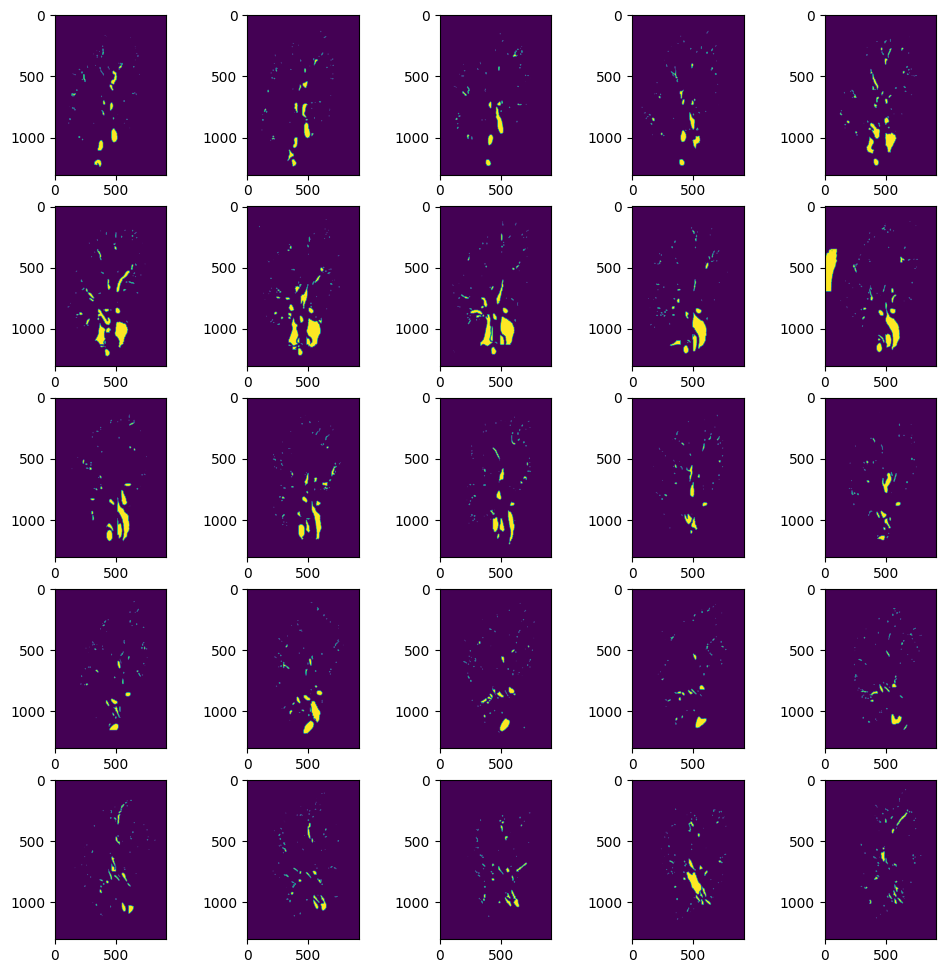

In [6]:
plt.figure(figsize=(12,12))
for n, res in enumerate(results):
    ax = plt.subplot(5,5,n+1)
    masks_array = res.masks.data.cpu().numpy()
    combined_mask = add_masks(masks_array)
    ax.imshow(combined_mask)

We also can see results provided by ultralytics

Let's plot first 4 predictions:

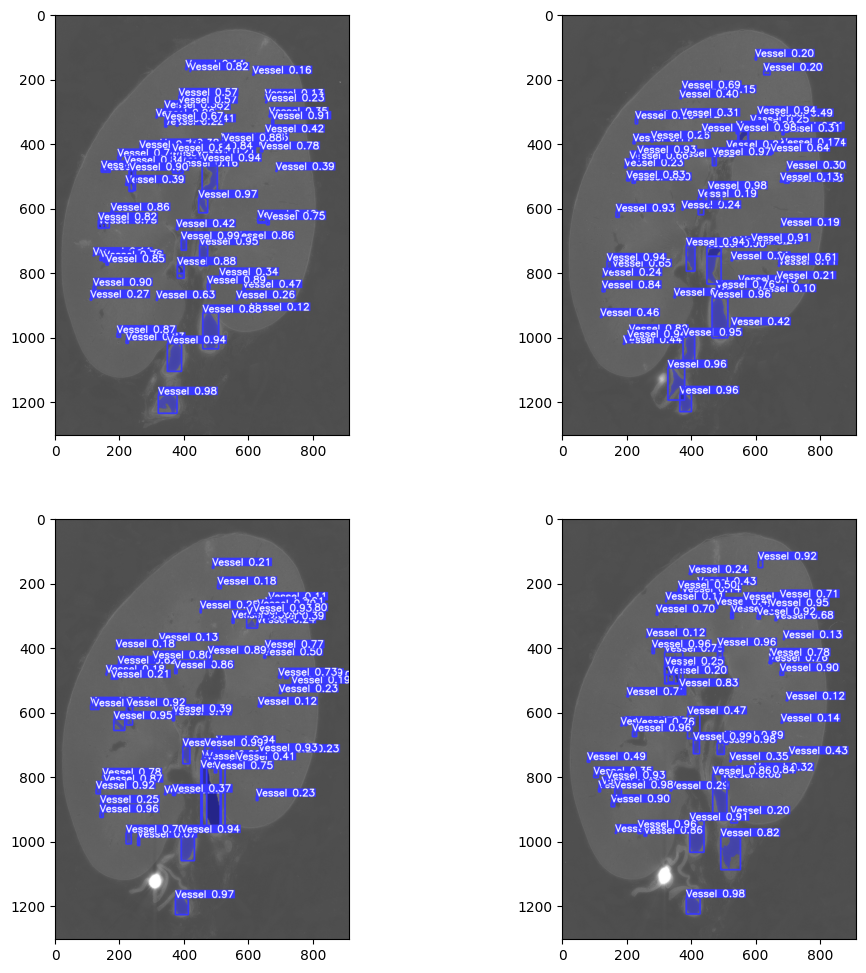

In [7]:
plt.figure(figsize=(12,12))
for n in range(4):
  ax = plt.subplot(2,2, n+1)
  ax.imshow(results[n].plot())